**Import Required Libraries**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

**Import the Dataset**

In [11]:
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [13]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


**Analysis of data**

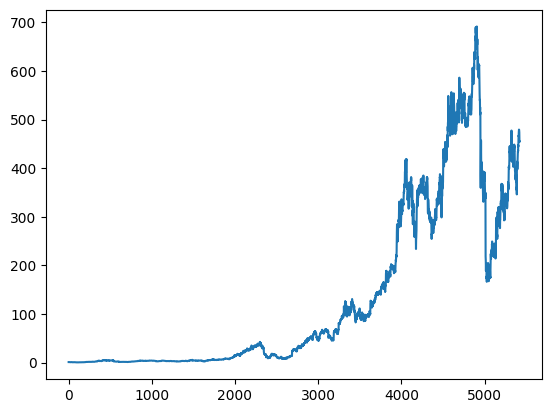

In [22]:
df2 = df.reset_index()['Close']
plt.plot(df2)

**Data Preprocessing**

In [15]:
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(5422, 1)

In [17]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Train-Test Split**

In [18]:
train_size = int(len(df2)*0.65)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [19]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [20]:
# calling the create dataset function to split the data into
# input output datasets with time step 100
time_step = 100
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [21]:
# checking values
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(3423, 100)
[[1.19130851e-03 1.21093916e-03 1.13448076e-03 ... 1.93213782e-04
  1.41551531e-04 2.33509325e-04]
 [1.21093916e-03 1.13448076e-03 1.05698811e-03 ... 1.41551531e-04
  2.33509325e-04 2.56239848e-04]
 [1.13448076e-03 1.05698811e-03 1.01049425e-03 ... 2.33509325e-04
  2.56239848e-04 1.25020767e-04]
 ...
 [1.67603454e-01 1.70380769e-01 1.69180160e-01 ... 1.26377802e-01
  1.26580312e-01 1.28373998e-01]
 [1.70380769e-01 1.69180160e-01 1.68861925e-01 ... 1.26580312e-01
  1.28373998e-01 1.27665198e-01]
 [1.69180160e-01 1.68861925e-01 1.71769421e-01 ... 1.28373998e-01
  1.27665198e-01 1.30370183e-01]]
(1797, 100)
(1797,)


**Creating and fitting LSTM model**

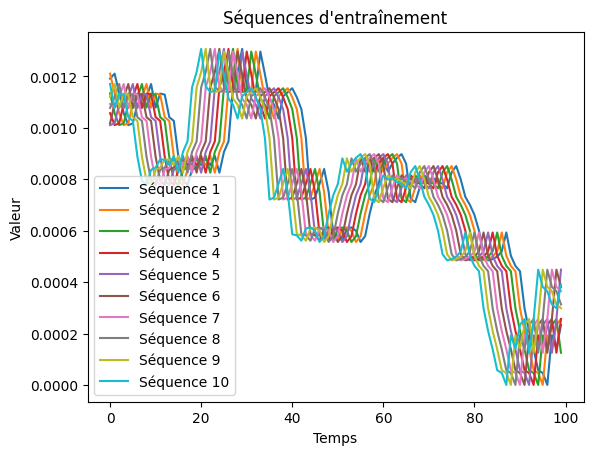

In [31]:
for i in range(10):
    plt.plot(X_train[i], label=f'Séquence {i+1}')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.title('Séquences d\'entraînement')
plt.legend()
plt.show()

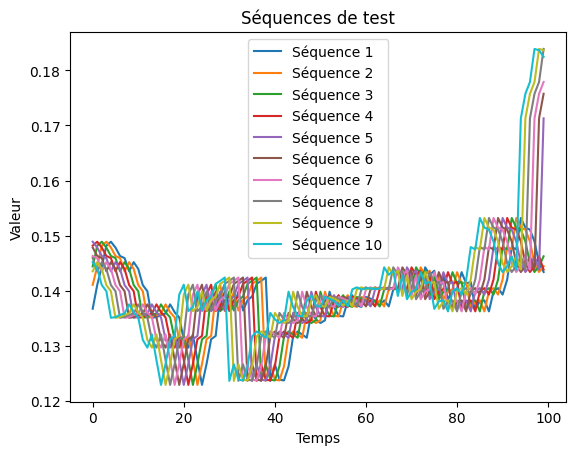

In [32]:
# Afficher les 10 premières séquences de test
for i in range(10):
    plt.plot(X_test[i], label=f'Séquence {i+1}')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.title('Séquences de test')
plt.legend()
plt.show()

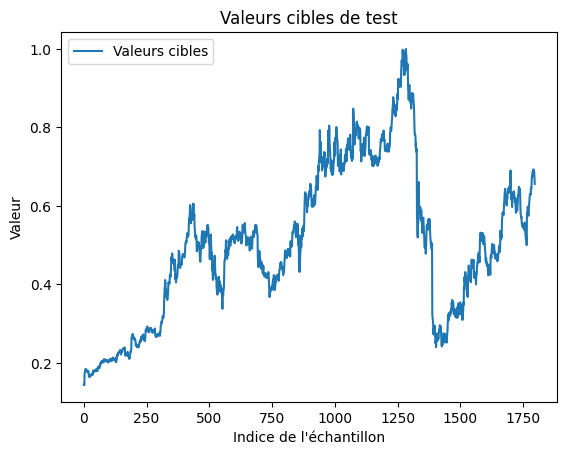

In [33]:
# Tracer les valeurs cibles de test
plt.plot(Y_test, label='Valeurs cibles')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Valeur')
plt.title('Valeurs cibles de test')
plt.legend()
plt.show()

In [23]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
54/54 [==============================] - 13s 235ms/step - loss: 3.3327e-06 - val_loss: 7.5660e-04
Epoch 2/100
54/54 [==============================] - 12s 226ms/step - loss: 4.8212e-06 - val_loss: 5.9735e-04
Epoch 3/100
54/54 [==============================] - 12s 214ms/step - loss: 3.4089e-06 - val_loss: 6.1762e-04
Epoch 4/100
54/54 [==============================] - 13s 236ms/step - loss: 3.0796e-06 - val_loss: 6.5272e-04
Epoch 5/100
54/54 [==============================] - 12s 231ms/step - loss: 4.4724e-06 - val_loss: 7.7972e-04
Epoch 6/100
54/54 [==============================] - 13s 233ms/step - loss: 3.7579e-06 - val_loss: 4.1317e-04
Epoch 7/100
54/54 [==============================] - 13s 243ms/step - loss: 3.5534e-06 - val_loss: 7.6606e-04
Epoch 8/100
54/54 [==============================] - 12s 232ms/step - loss: 3.6006e-06 - val_loss: 4.0994e-04
Epoch 9/100
54/54 [==============================] - 11s 213ms/step - loss: 3.8257e-06 - val_loss: 2.8296e-04
Epoch 10/1

**Prediction and checking performance matrix**

In [40]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

57/57 [==============================] - 2s 35ms/step


In [41]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [42]:
print(math.sqrt(mean_squared_error(Y_train,train_predict)))
print(math.sqrt(mean_squared_error(Y_test,test_predict)))

37.101553504748935
353.1906595714353


**Graph Plotting**

In [43]:
look_back = 100

In [52]:
# Convertir la série pandas en un tableau NumPy bidimensionnel
df2_values = df2.values.reshape(-1, 1)


In [53]:
trainPredictPlot = np.empty_like(df2_values)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


In [56]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict) + (look_back)*2 + 1 : len(df2) - 1] = test_predict.flatten()


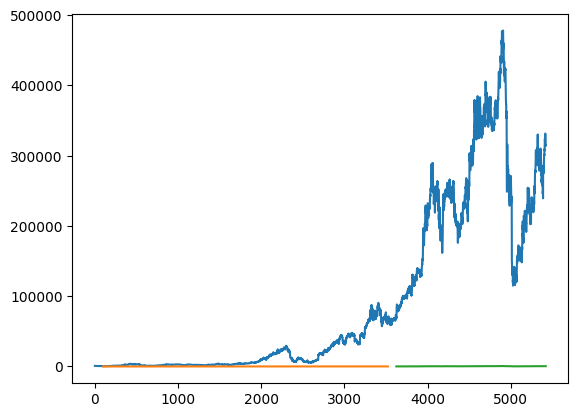

In [58]:
plt.plot(scaler.inverse_transform(df2.values.reshape(-1, 1)))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
